In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/k-means/datasets_395787_761219_data_student.csv'
df = pd.read_csv(url)

#https://www.kaggle.com/fafiliam/user-knowledge

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [4]:
import scipy.cluster.hierarchy as sch

# 1-8

In [5]:
df.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [6]:
df.tail(10)

,STG,SCG,STR,LPR,PEG,UNS
248,0.89,0.68,0.49,0.65,0.90,High
249,0.72,0.60,0.45,0.79,0.45,Middle
250,0.68,0.63,0.65,0.09,0.66,Middle
251,0.56,0.60,0.60,0.31,0.50,Middle
252,0.54,0.51,0.55,0.64,0.19,Low
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle
257,0.66,0.90,0.76,0.87,0.74,High


In [7]:
df.sample(10)

,STG,SCG,STR,LPR,PEG,UNS
68,0.280,0.100,0.12,0.28,0.32,Low
125,0.312,0.800,0.67,0.92,0.50,High
177,0.490,0.340,0.88,0.75,0.71,High
228,0.880,0.335,0.19,0.55,0.78,High
198,0.780,0.150,0.38,0.18,0.63,Middle
27,0.090,0.255,0.60,0.45,0.25,Low
138,0.410,0.090,0.58,0.18,0.58,Middle
76,0.265,0.060,0.57,0.75,0.10,Low
70,0.270,0.120,0.37,0.29,0.58,Middle
75,0.255,0.180,0.50,0.40,0.10,very_low


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [9]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


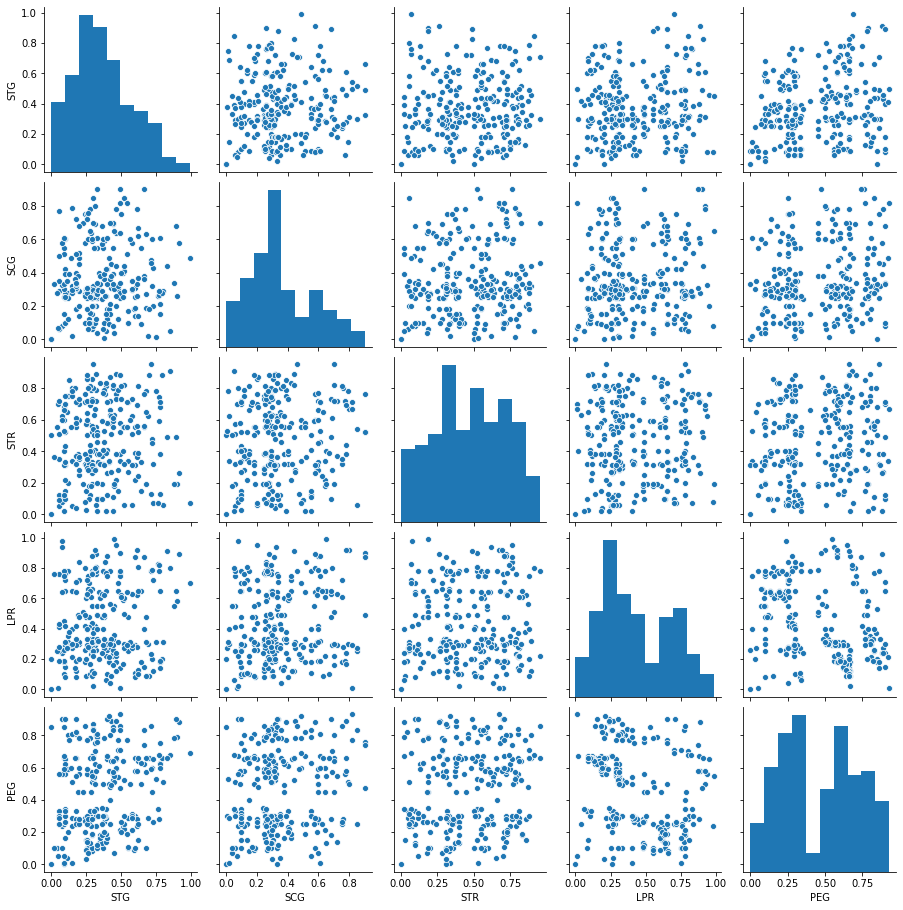

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,STG,SCG,STR,LPR,PEG
STG,1.000000,0.081035,0.040841,0.099543,0.206359
SCG,0.081035,1.000000,0.083732,0.097816,0.182792
STR,0.040841,0.083732,1.000000,0.036481,0.120779
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000


In [12]:
#หาค่า max min ของ  corr()

c = df.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")

dfa = pd.DataFrame(so)
dfb = dfa[dfa.iloc[:,0] != 1] #ตัดค่าที่เป็น 1 ออก
dfb

0
PEG LPR -0.269574
LPR PEG -0.269574
    STR  0.036481
STR LPR  0.036481
    STG  0.040841
STG STR  0.040841
SCG STG  0.081035
STG SCG  0.081035
SCG STR  0.083732
STR SCG  0.083732
LPR SCG  0.097816
SCG LPR  0.097816
STG LPR  0.099543
LPR STG  0.099543
PEG STR  0.120779
STR PEG  0.120779
SCG PEG  0.182792
PEG SCG  0.182792
    STG  0.206359
STG PEG  0.206359

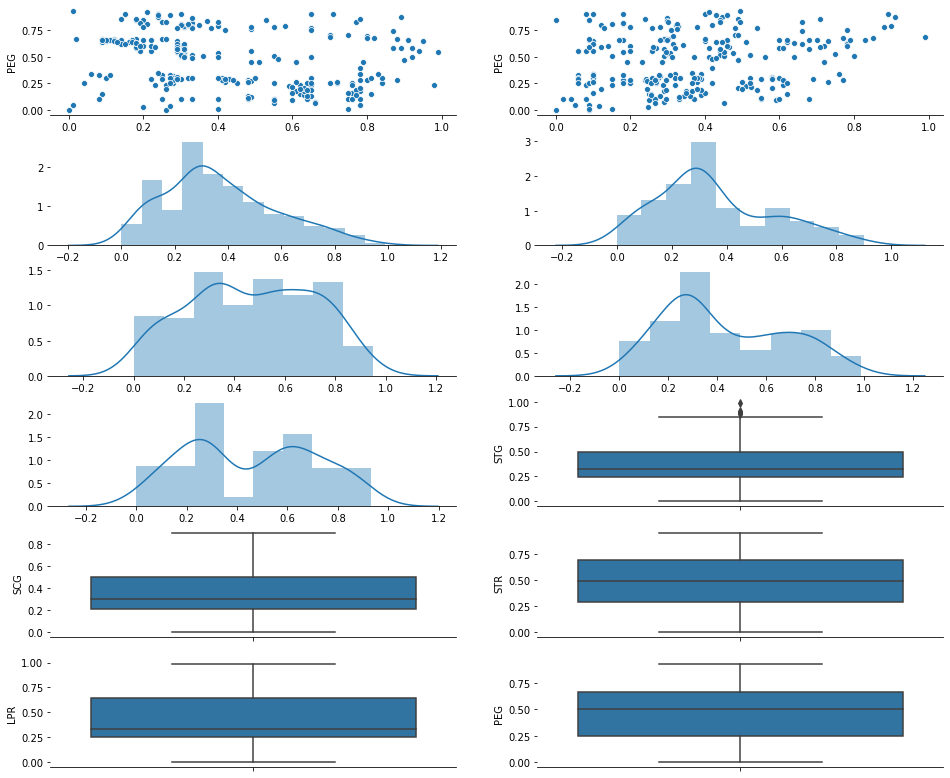

In [13]:
f, axes = plt.subplots(6, 2, figsize=(16, 14), sharex=False)
sns.despine(left=True)

sns.scatterplot(x=df.iloc[:,3],y=df.iloc[:,4],data=df, ax=axes[0, 0]) #max corr
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,4],data=df, ax=axes[0, 1])#min corr
sns.distplot(df.iloc[:,0], ax=axes[1, 0]) 
sns.distplot(df.iloc[:,1], ax=axes[1, 1])
sns.distplot(df.iloc[:,2], ax=axes[2, 0]) 
sns.distplot(df.iloc[:,3], ax=axes[2, 1])
sns.distplot(df.iloc[:,4], ax=axes[3, 0])
sns.boxplot(df.iloc[:,0],ax=axes[3, 1],orient='v')
sns.boxplot(df.iloc[:,1],ax=axes[4, 0],orient='v')
sns.boxplot(df.iloc[:,2],ax=axes[4, 1],orient='v')
sns.boxplot(df.iloc[:,3],ax=axes[5, 0],orient='v')
sns.boxplot(df.iloc[:,4],ax=axes[5, 1],orient='v') 


# 9-11 เลือกฟีเจอร์ STG กับ PEG

In [14]:
X = df.iloc[:,[0,4]]

## KMeans

In [15]:
kmeans = KMeans(n_clusters=2 , random_state= 100)

In [16]:
y_predict = kmeans.fit_predict(X)

In [17]:
kmeans.cluster_centers_

array([[0.32184677, 0.22115323],
       [0.41676866, 0.67820896]])

In [18]:
kmeans.inertia_

14.067984155031295

In [19]:
kmeans.n_iter_

6

In [20]:
x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]

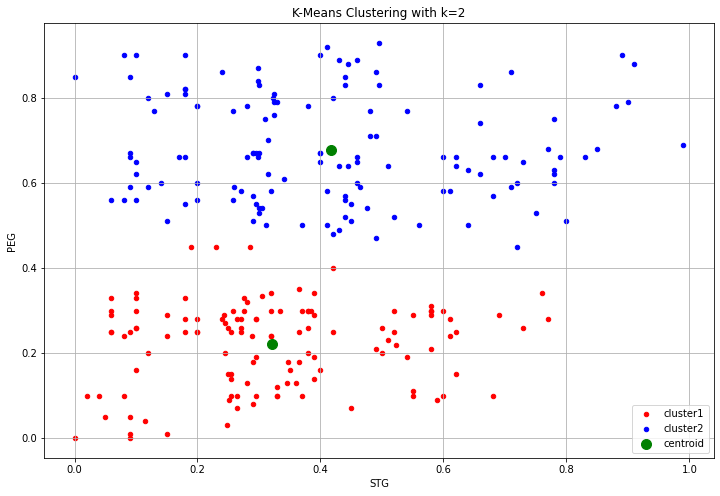

In [21]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=2')
plt.xlabel('STG')
plt.ylabel('PEG')
plt.legend()
plt.grid()

### 12-14 ทำ Elbow Method 

In [22]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,random_state=100)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

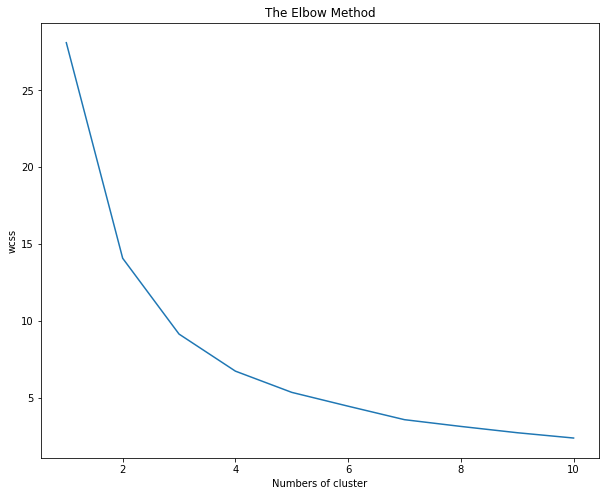

In [23]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of cluster')
plt.ylabel('wcss')

In [24]:
kmeans = KMeans(n_clusters=4 , random_state= 100)

In [25]:
y_predict = kmeans.fit_predict(X)

In [26]:
x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]
x4 = X[y_predict == 3].iloc[:,[0]]
y4 = X[y_predict == 3].iloc[:,[1]]

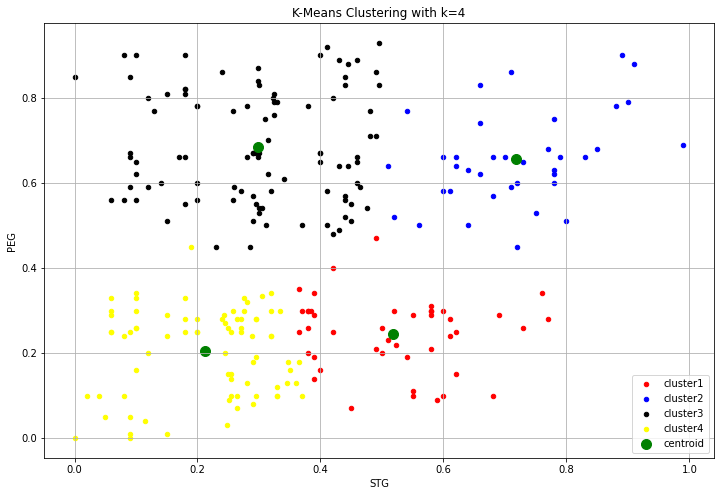

In [27]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=4')
plt.xlabel('STG')
plt.ylabel('PEG')
plt.legend()
plt.grid()

## Hierarchical กำหนดให้ n_clusters=4 เพื่อเทียบกับ K-Means ทำ Elbow Method และกำหนด n_clusters=4



Text(0.5, 1.0, 'dendrogram of PEG VS STG')

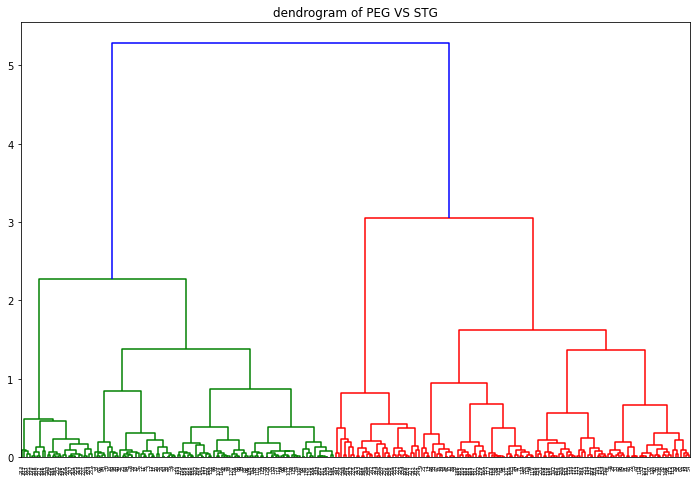

In [28]:
fig = plt.figure(figsize =(12,8))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram of PEG VS STG')

In [29]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [30]:
y_predict = hc.fit_predict(X)

<Figure size 864x576 with 0 Axes>

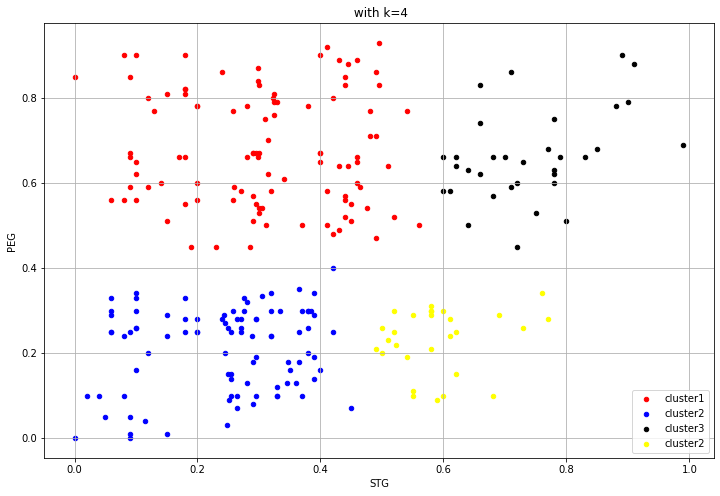

In [31]:
fig = plt.figure(figsize=(12,8))

x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]
x4 = X[y_predict == 3].iloc[:,[0]]
y4 = X[y_predict == 3].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster2')

plt.title(' with k=4')
plt.xlabel('STG')
plt.ylabel('PEG')
plt.legend()
plt.grid()

###ลองให้ df.iloc[:,5] เป็น cluster ไม่ได้เป็นการบ้านแต่ทดลองให้ feature สุดท้ายเป็น cluster ที่ถูกต้อง ผลการลอง พบว่าไม่ค่อยดีเท่าที่ควร

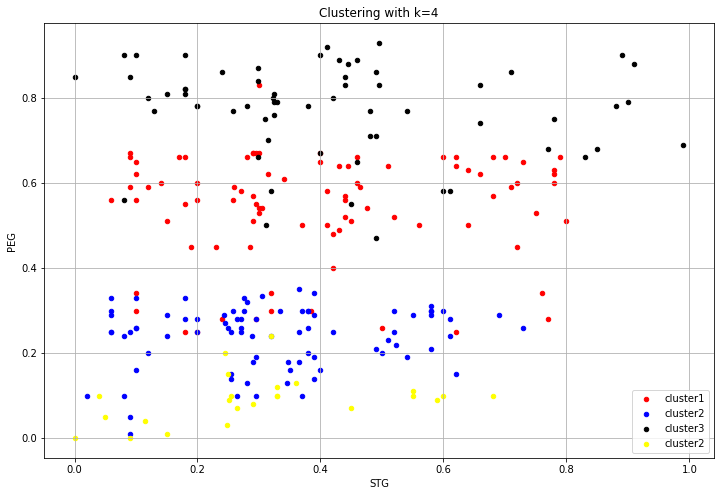

In [32]:
df.iloc[:,5] = [0 if x == 'Middle' else (1 if x == 'Low' else (2 if x == 'High' else (3))) for x in df.iloc[:,5]] #เปลี่ยน Middle เป็น 0 , Low เป็น 1 , High เป็น 2 , very_low เป็น 3

x1 = df[df.iloc[:,5] == 0].iloc[:,[0]]
y1 = df[df.iloc[:,5] == 0].iloc[:,[4]]
x2 = df[df.iloc[:,5] == 1].iloc[:,[0]]
y2 = df[df.iloc[:,5] == 1].iloc[:,[4]]
x3 = df[df.iloc[:,5] == 2].iloc[:,[0]]
y3 = df[df.iloc[:,5] == 2].iloc[:,[4]]
x4 = df[df.iloc[:,5] == 3].iloc[:,[0]]
y4 = df[df.iloc[:,5] == 3].iloc[:,[4]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster2')

#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('Clustering with k=4')
plt.xlabel('STG')
plt.ylabel('PEG')
plt.legend()
plt.grid()

# 15-18 เลือกฟีเจอร์ SCG , LPR


In [33]:
X = df.iloc[:,[1,3]]

## K-Means

In [34]:
kmeans = KMeans(n_clusters=2 , random_state= 100)

In [35]:
y_predict = kmeans.fit_predict(X)

In [36]:
kmeans.cluster_centers_

array([[0.38545455, 0.70979798],
       [0.33713208, 0.26018868]])

In [37]:
kmeans.inertia_

14.89092707108824

In [38]:
kmeans.n_iter_

6

In [39]:
x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]

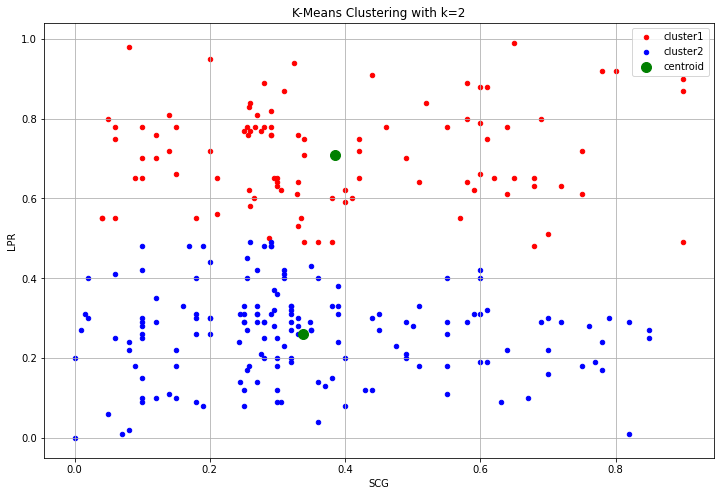

In [40]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=2')
plt.xlabel('SCG')
plt.ylabel('LPR')
plt.legend()
plt.grid()

### 19-21 ทำ Elbow Method

Text(0, 0.5, 'wcss')

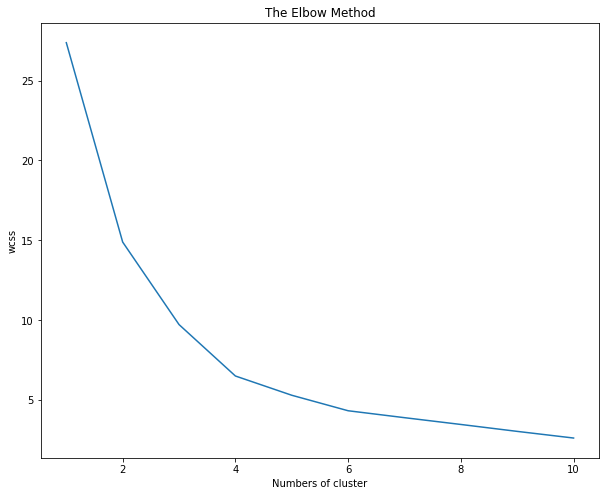

In [41]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,random_state=100)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of cluster')
plt.ylabel('wcss')

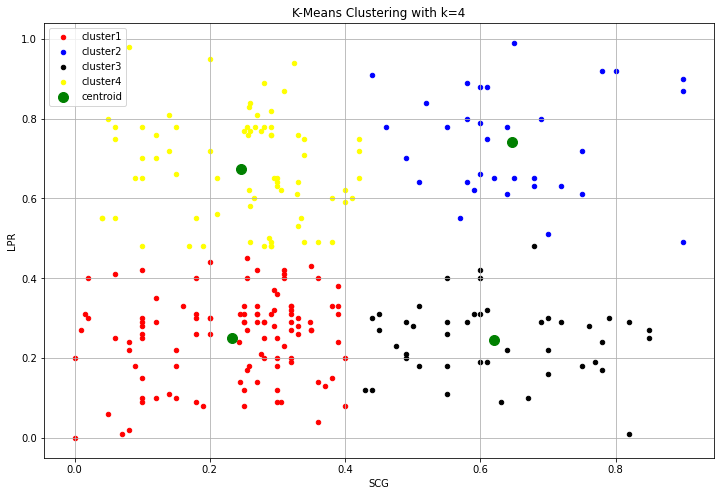

In [42]:
kmeans = KMeans(n_clusters=4 , random_state= 100)

y_predict = kmeans.fit_predict(X)

x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]
x4 = X[y_predict == 3].iloc[:,[0]]
y4 = X[y_predict == 3].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=4')
plt.xlabel('SCG')
plt.ylabel('LPR')
plt.legend()
plt.grid()

## Hierarchical กำหนดให้ n_clusters=4 เพื่อเทียบกับ K-Means ทำ Elbow Method และกำหนด n_clusters=4


Text(0.5, 1.0, 'dendrogram of SCG VS LPR')

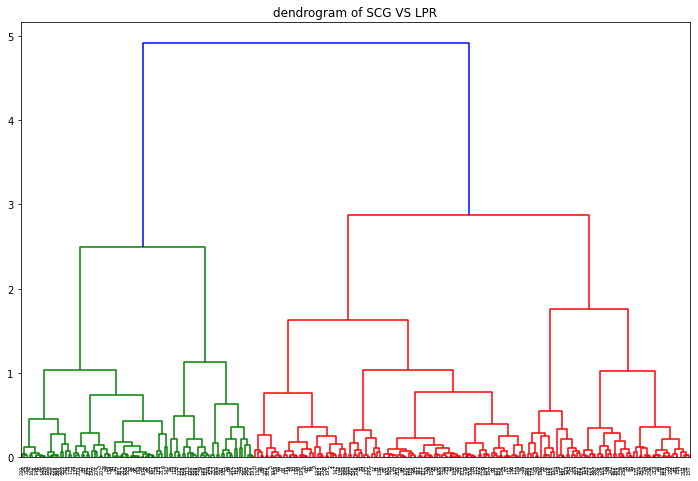

In [43]:
fig = plt.figure(figsize =(12,8))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram of SCG VS LPR')

In [44]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [45]:
y_predict = hc.fit_predict(X)

<Figure size 864x576 with 0 Axes>

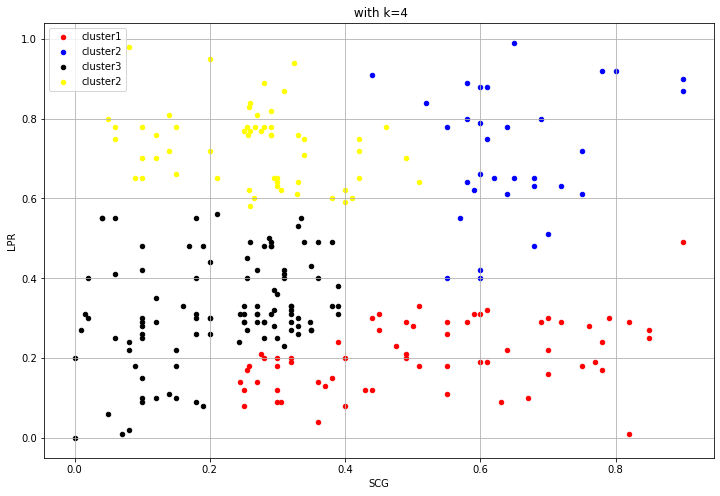

In [46]:
fig = plt.figure(figsize=(12,8))

x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]
x4 = X[y_predict == 3].iloc[:,[0]]
y4 = X[y_predict == 3].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster2')

plt.title(' with k=4')
plt.xlabel('SCG')
plt.ylabel('LPR')
plt.legend()
plt.grid()

###ลองให้ df.iloc[:,5] เป็น cluster ไม่ได้เป็นการบ้านแต่ทดลองให้ feature สุดท้ายเป็น cluster ที่ถูกต้อง ผลการลอง พบว่าแย่


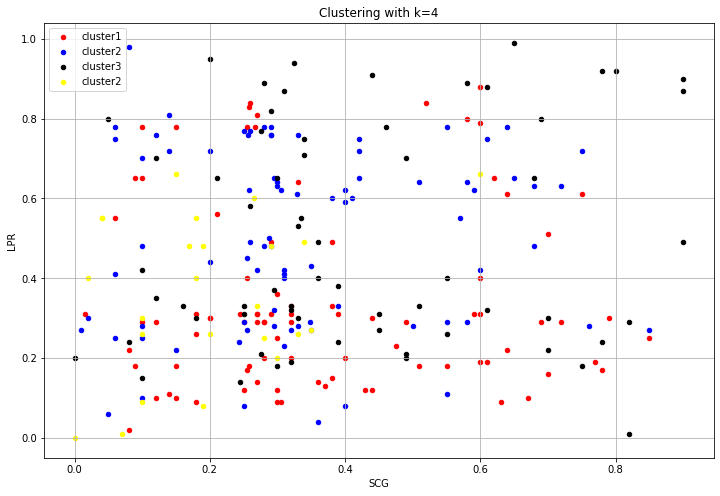

In [47]:
x1 = df[df.iloc[:,5] == 0].iloc[:,[1]]
y1 = df[df.iloc[:,5] == 0].iloc[:,[3]]
x2 = df[df.iloc[:,5] == 1].iloc[:,[1]]
y2 = df[df.iloc[:,5] == 1].iloc[:,[3]]
x3 = df[df.iloc[:,5] == 2].iloc[:,[1]]
y3 = df[df.iloc[:,5] == 2].iloc[:,[3]]
x4 = df[df.iloc[:,5] == 3].iloc[:,[1]]
y4 = df[df.iloc[:,5] == 3].iloc[:,[3]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster2')

#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('Clustering with k=4')
plt.xlabel('SCG')
plt.ylabel('LPR')
plt.legend()
plt.grid()